# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load data

In [2]:
ed = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
ed

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

# data Preprocessing

In [4]:
ed.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [5]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
ed.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [7]:
ed.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
ed.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [9]:
ed.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [10]:
# Droping the unwanted Columns

ed.drop(columns=['Qual_miles','cc2_miles','cc3_miles'],inplace=True)
ed

ID#  Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0        1    28143          1          174            1                  0   
1        2    19244          1          215            2                  0   
2        3    41354          1         4123            4                  0   
3        4    14776          1          500            1                  0   
4        5    97752          4        43300           26               2077   
...    ...      ...        ...          ...          ...                ...   
3994  4017    18476          1         8525            4                200   
3995  4018    64385          1          981            5                  0   
3996  4019    73597          3        25447            8                  0   
3997  4020    54899          1          500            1                500   
3998  4021     3016          1            0            0                  0   

      Flight_trans_12  Days_since_enroll  Award?  
0                   0               7000       0  
1                   0               6968       0  
2                   0               7034       0  
3                   0               6952       0  
4                   4               6935       1  
...               ...                ...     ...  
3994                1               1403       1  
3995                0               1395       1  
3996                0               1402       1  
3997                1               1401       0  
3998                0               1398       0  

[3999 rows x 9 columns]

# identify the outlier

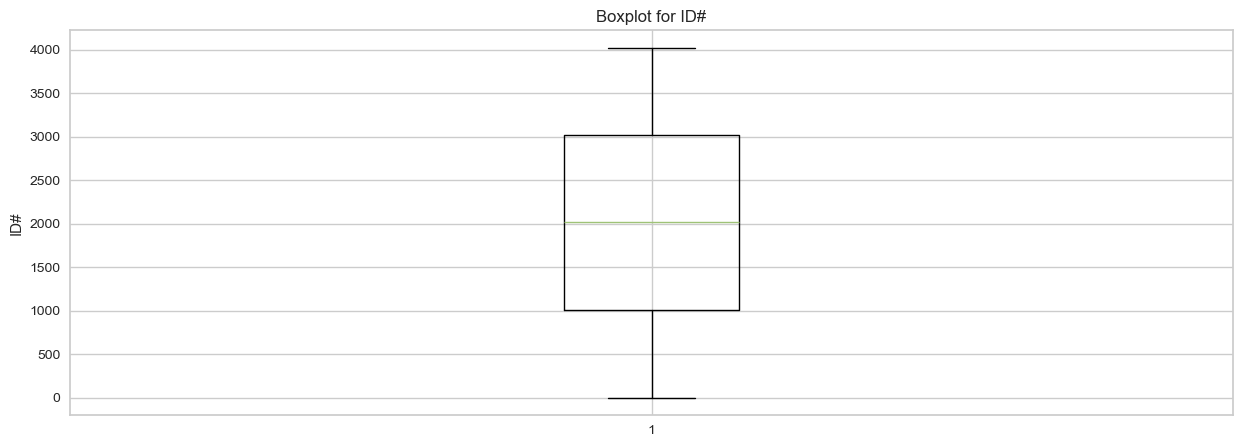

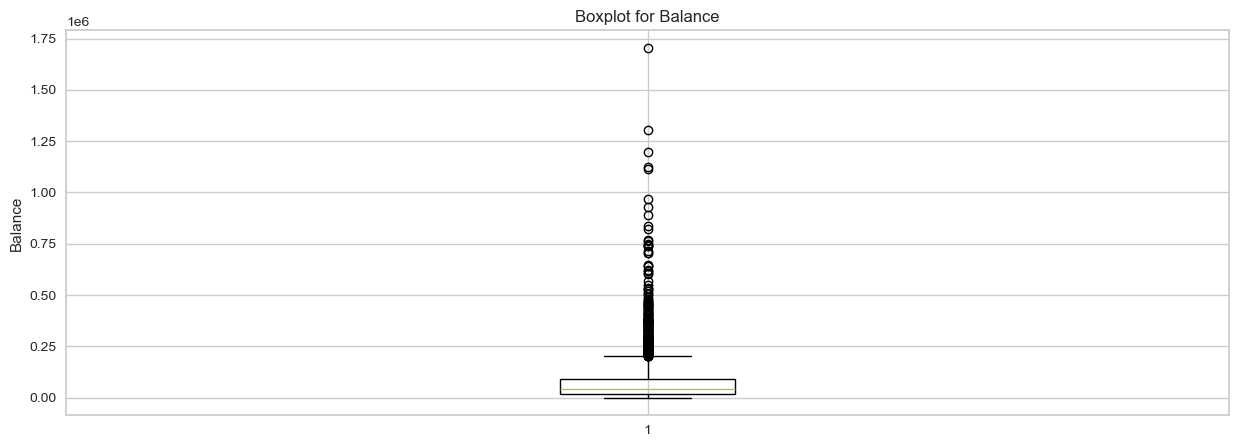

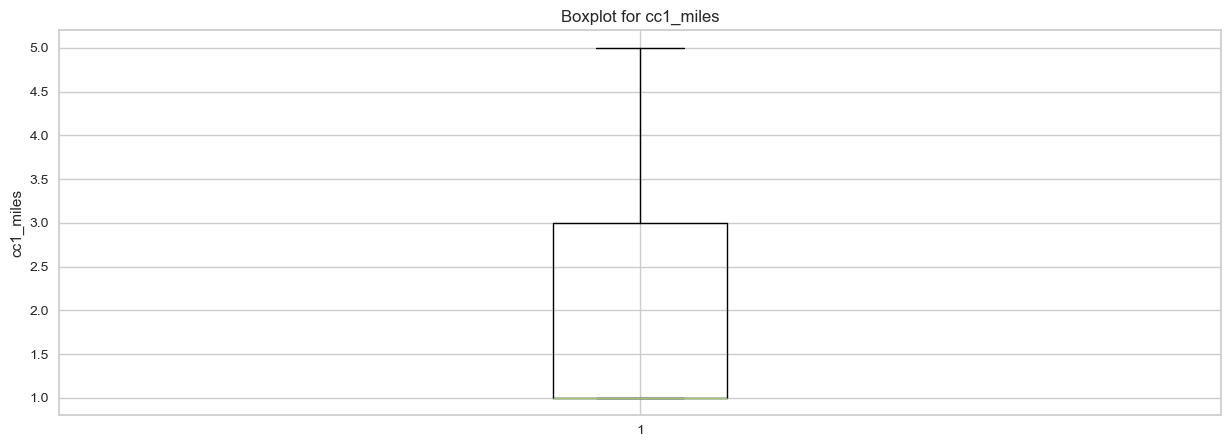

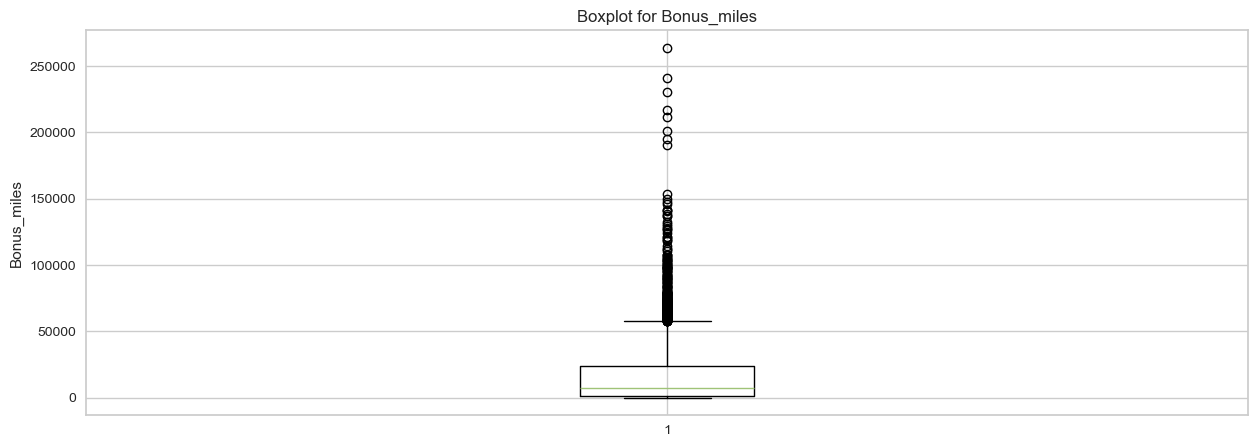

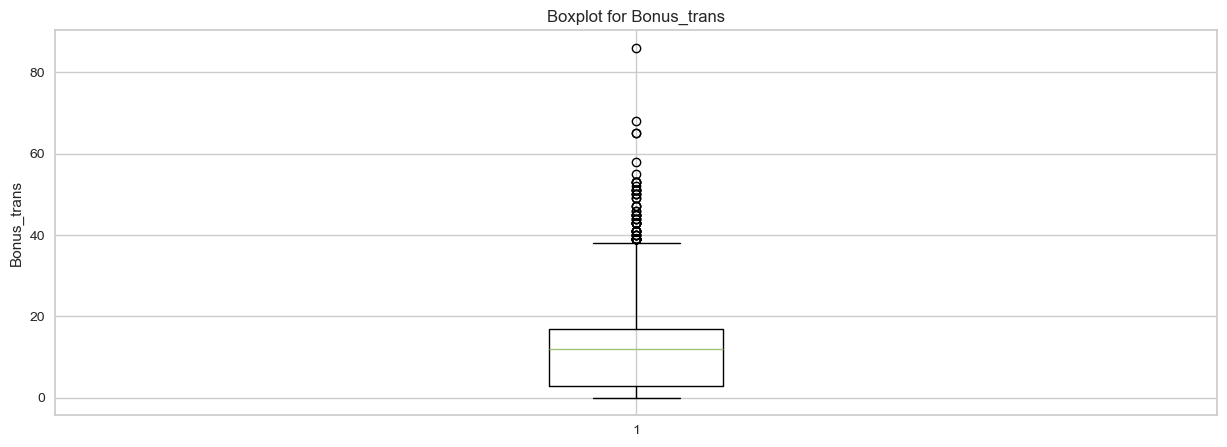

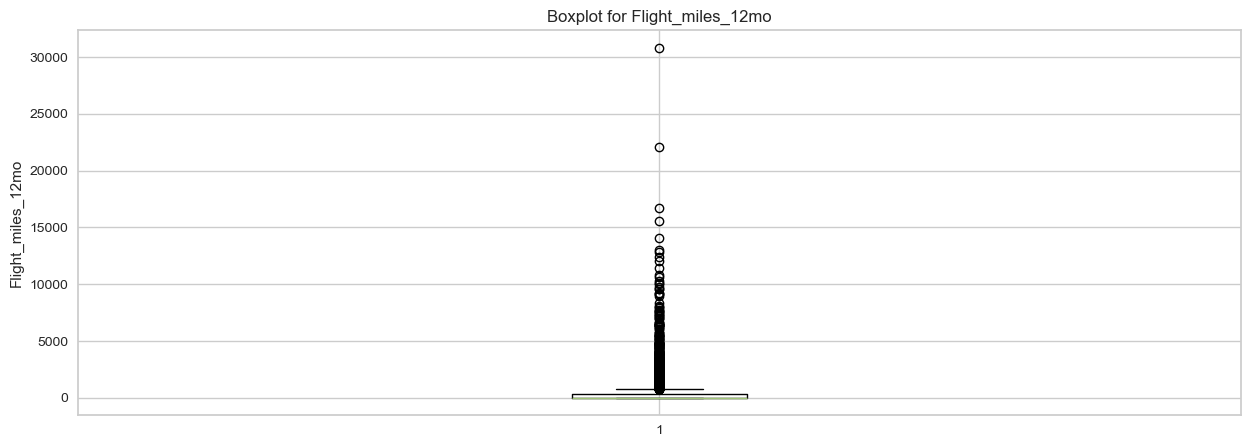

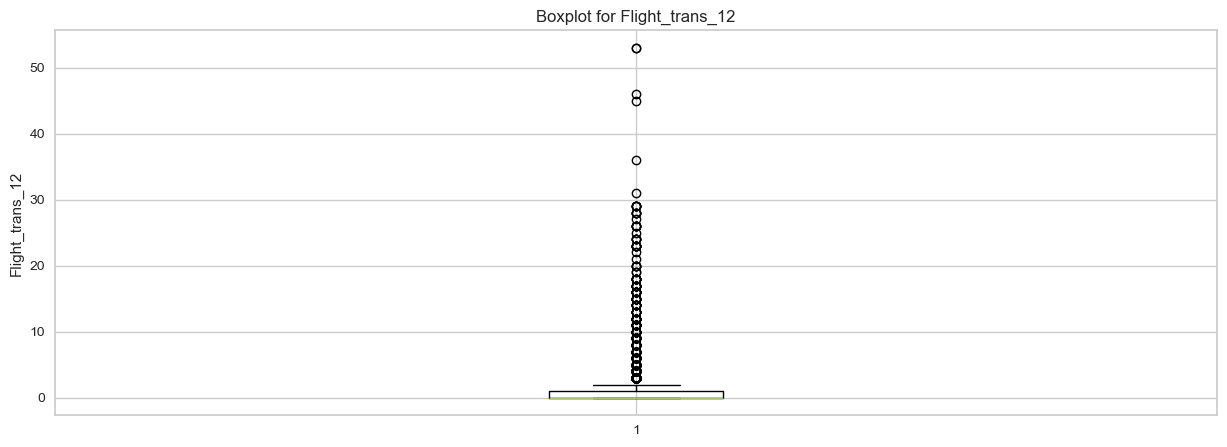

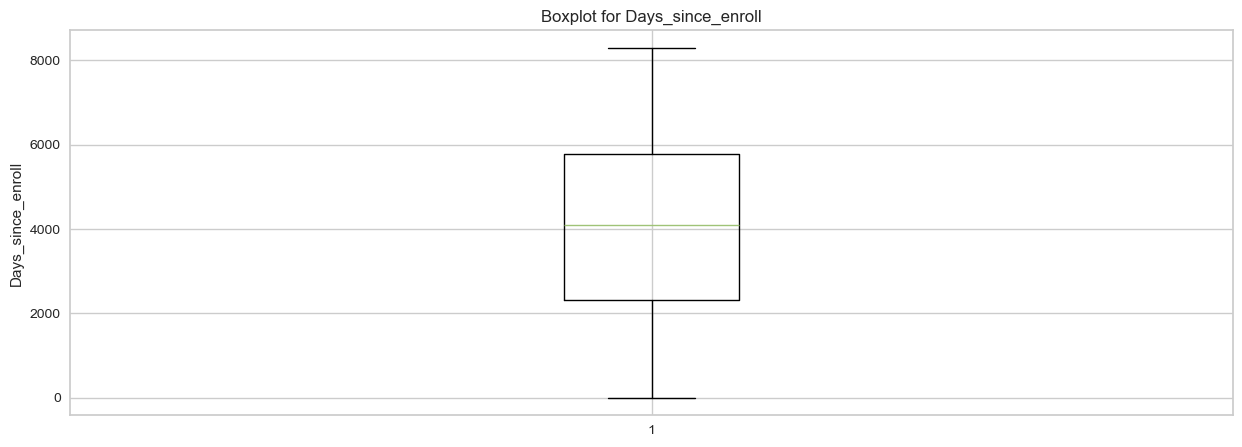

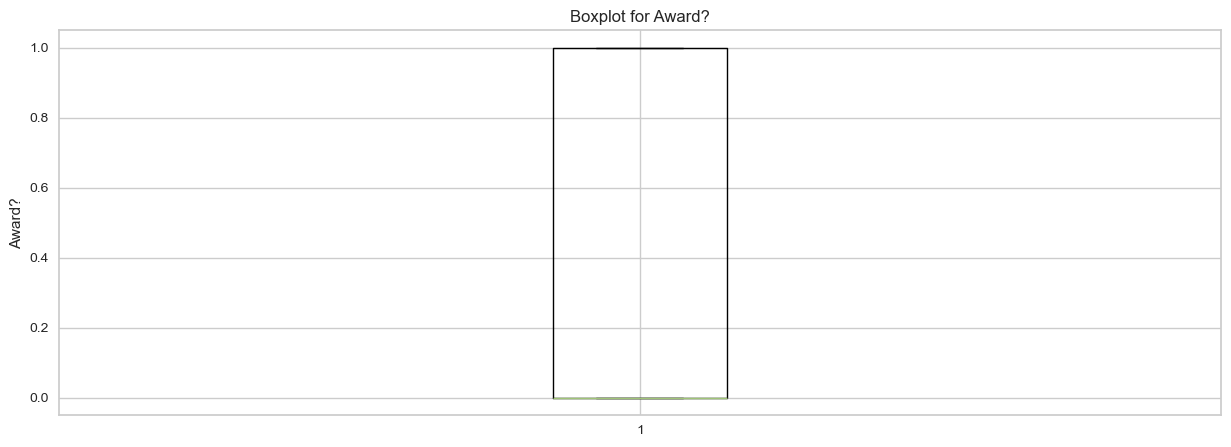

In [11]:
for column in ed.columns:
    plt.figure(figsize=(15,5))  # Create a new figure for each plot
    plt.boxplot(ed[column])
    plt.title(f"Boxplot for {column}")
    plt.ylabel(column)
    plt.show()

In [13]:
ed.head()

ID#  Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0    1    28143          1          174            1                  0   
1    2    19244          1          215            2                  0   
2    3    41354          1         4123            4                  0   
3    4    14776          1          500            1                  0   
4    5    97752          4        43300           26               2077   

   Flight_trans_12  Days_since_enroll  Award?  
0                0               7000       0  
1                0               6968       0  
2                0               7034       0  
3                0               6952       0  
4                4               6935       1

# Remove the outlier

In [14]:
def outlier_Detection(ed,columns):
    for col in columns:
        Q1=ed[col].quantile(0.25)
        Q3=ed[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        ed[col]=np.where(ed[col]>upper,upper,np.where(ed[col]<lower,lower,ed[col]))
    return ed

In [15]:
outlier_Detection(ed,['Balance','cc1_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?'])

ID#  Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0        1  28143.0        1.0        174.0          1.0                0.0   
1        2  19244.0        1.0        215.0          2.0                0.0   
2        3  41354.0        1.0       4123.0          4.0                0.0   
3        4  14776.0        1.0        500.0          1.0                0.0   
4        5  97752.0        4.0      43300.0         26.0              777.5   
...    ...      ...        ...          ...          ...                ...   
3994  4017  18476.0        1.0       8525.0          4.0              200.0   
3995  4018  64385.0        1.0        981.0          5.0                0.0   
3996  4019  73597.0        3.0      25447.0          8.0                0.0   
3997  4020  54899.0        1.0        500.0          1.0              500.0   
3998  4021   3016.0        1.0          0.0          0.0                0.0   

      Flight_trans_12  Days_since_enroll  Award?  
0                 0.0             7000.0     0.0  
1                 0.0             6968.0     0.0  
2                 0.0             7034.0     0.0  
3                 0.0             6952.0     0.0  
4                 2.5             6935.0     1.0  
...               ...                ...     ...  
3994              1.0             1403.0     1.0  
3995              0.0             1395.0     1.0  
3996              0.0             1402.0     1.0  
3997              1.0             1401.0     0.0  
3998              0.0             1398.0     0.0  

[3999 rows x 9 columns]

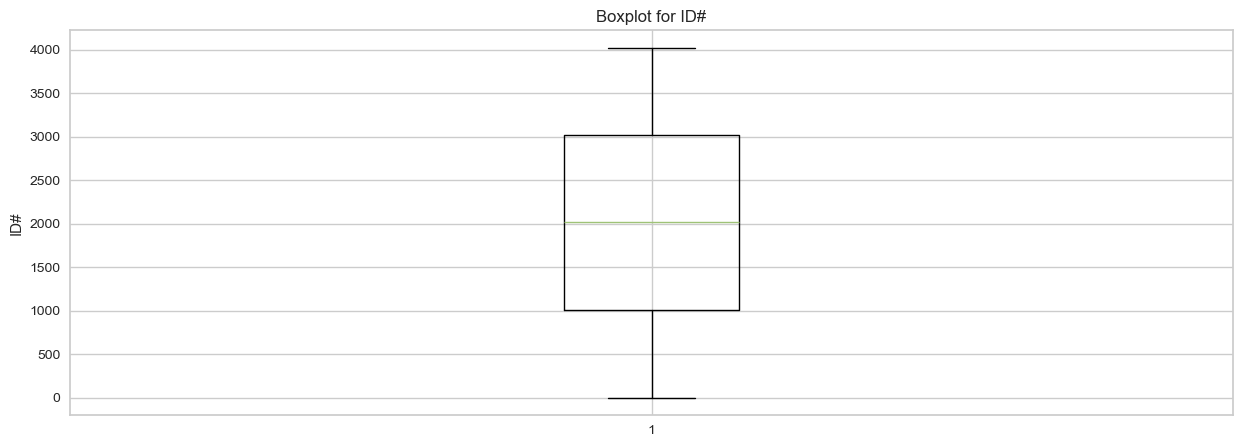

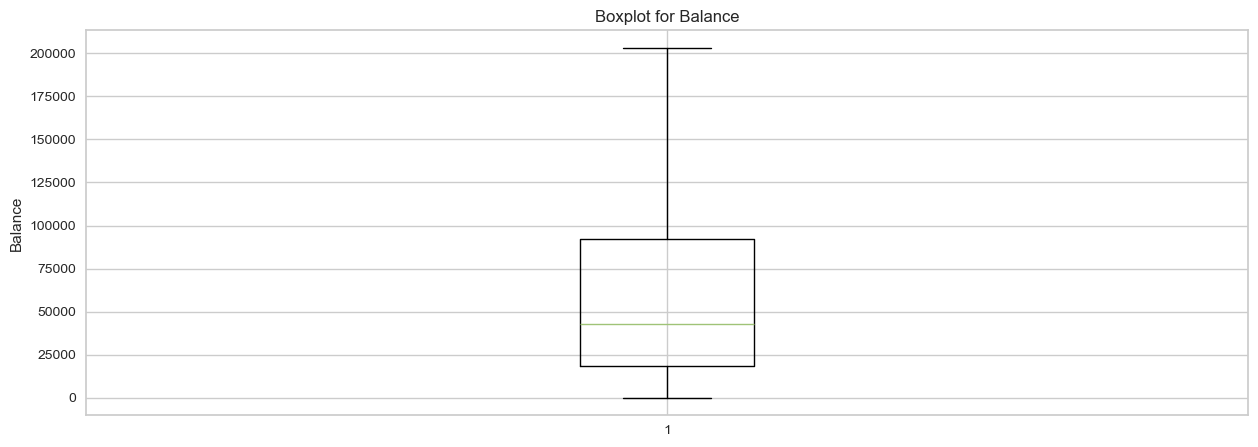

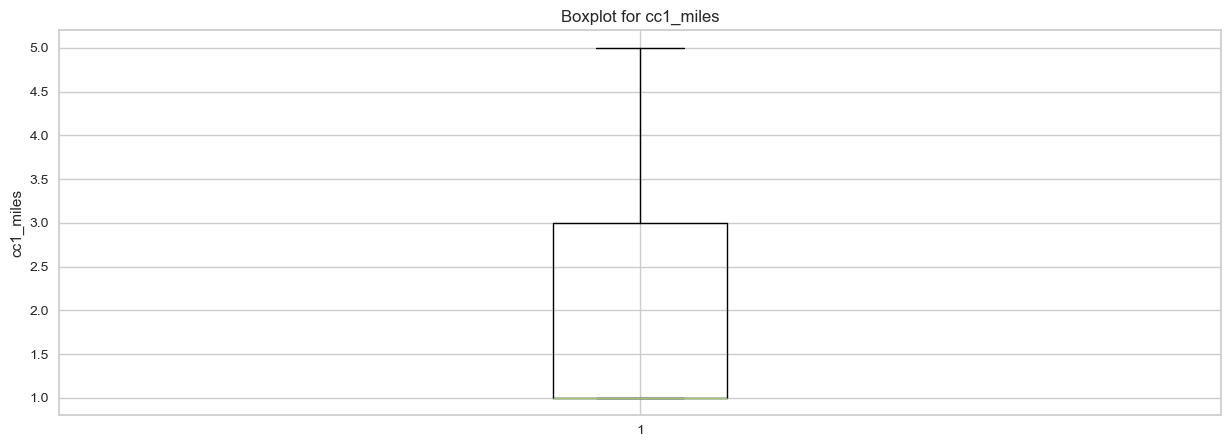

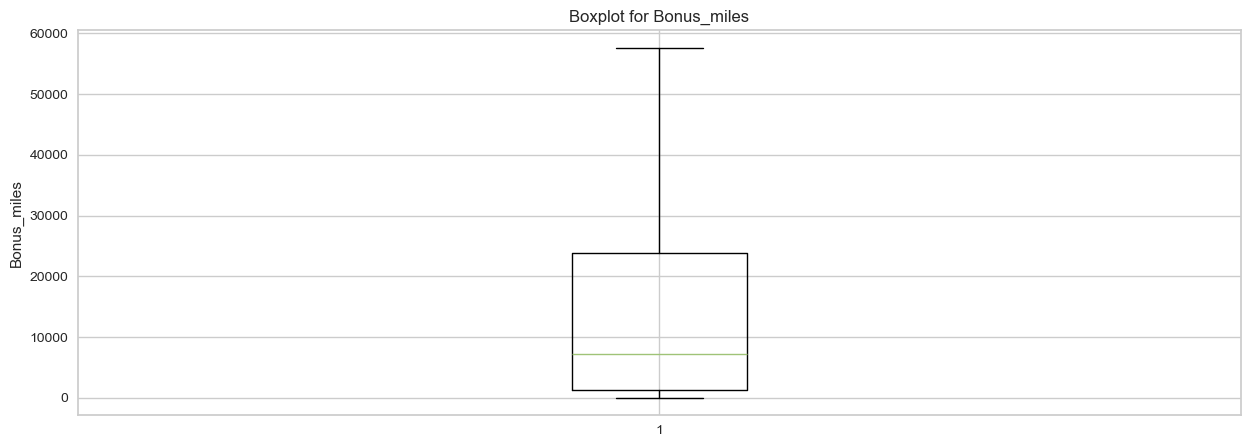

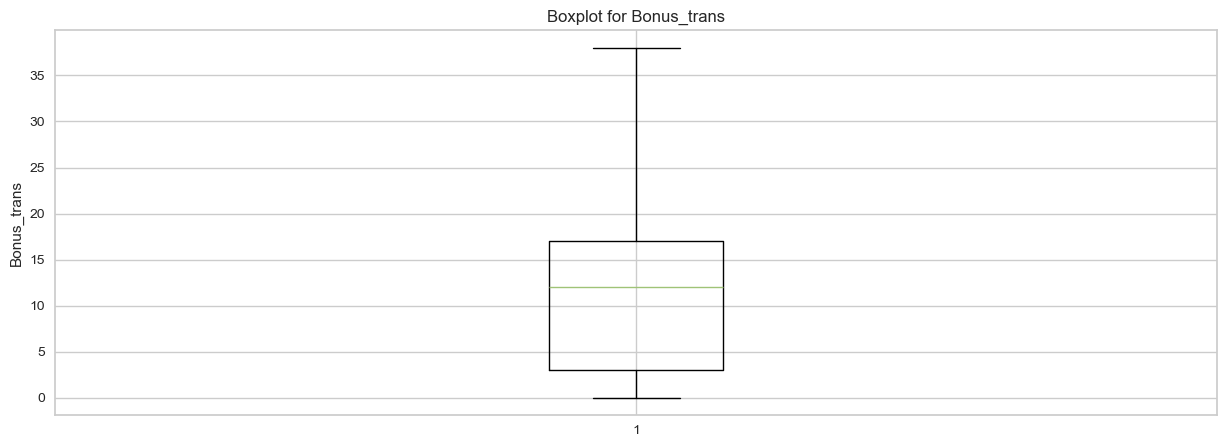

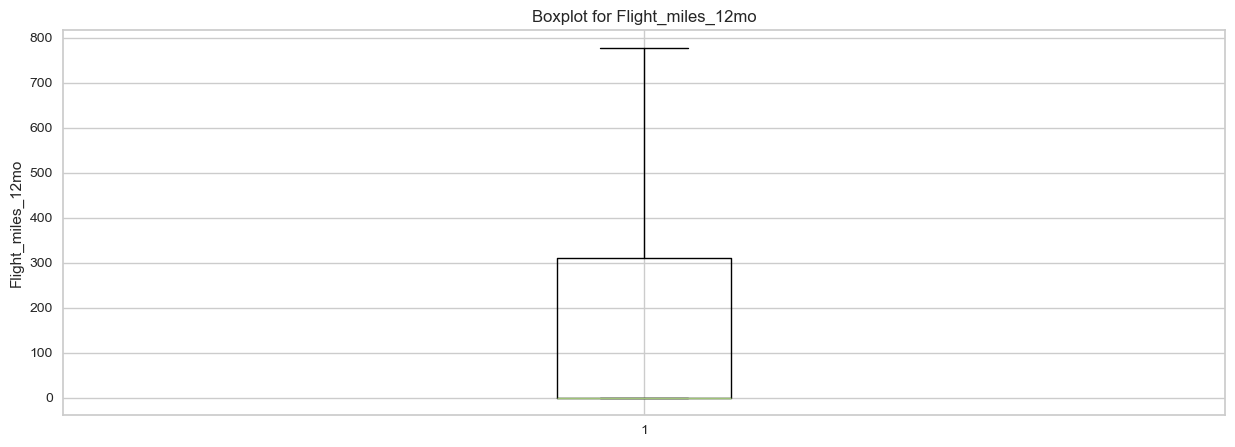

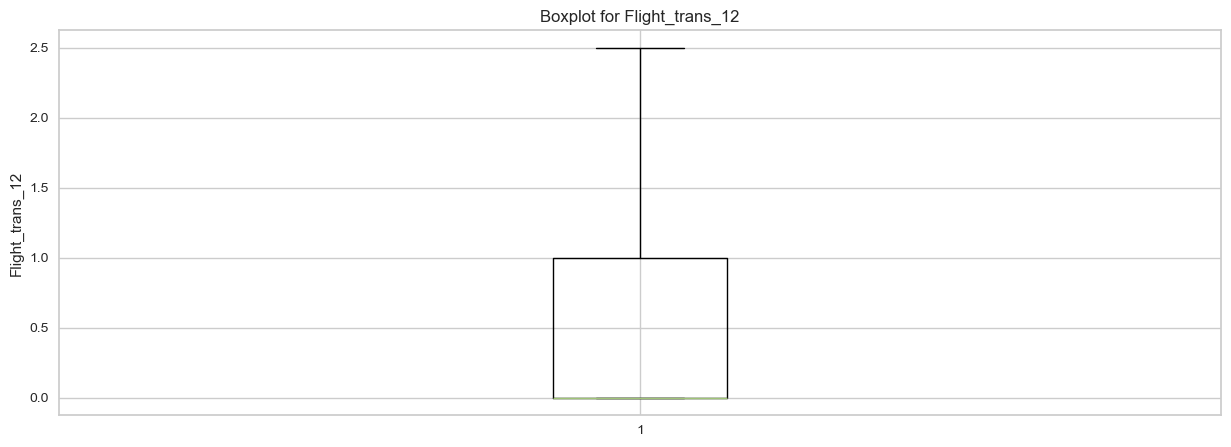

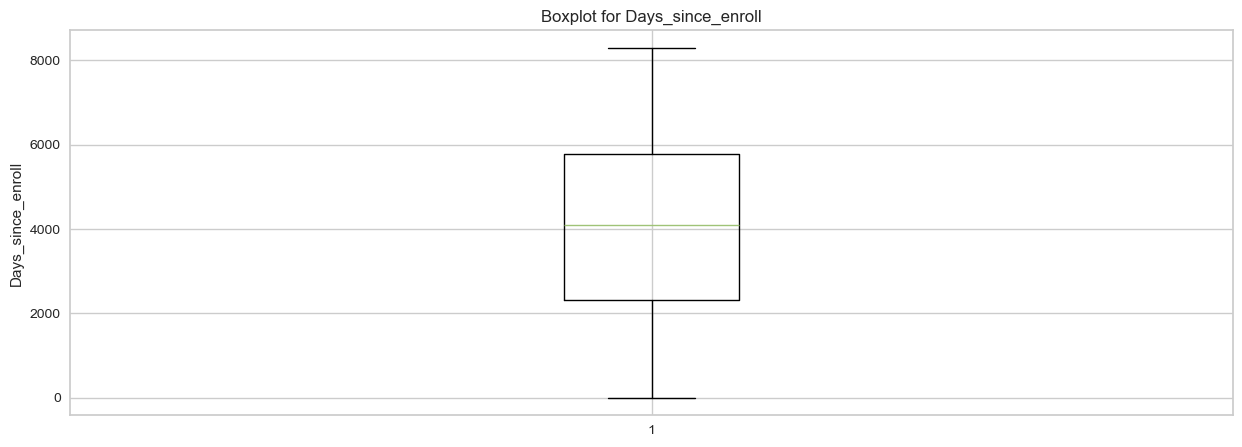

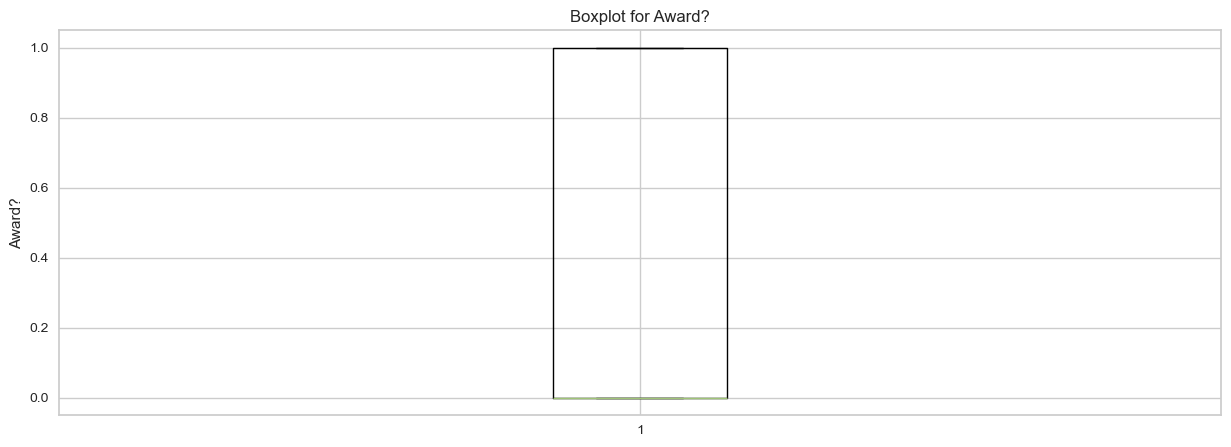

In [17]:
# checking if outlier is removed 
for column in ed.columns:
    plt.figure(figsize=(15,5))  # Create a new figure for each plot
    plt.boxplot(ed[column])
    plt.title(f"Boxplot for {column}")
    plt.ylabel(column)
    plt.show()

# Standard Scaler

In [25]:
#Convert data in the Standard Scale 0-1
sc = StandardScaler()

In [26]:
data=sc.fit_transform(ed)
data

array([[-1.73512503, -0.60725829, -0.76957841, ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.75894657, -0.76957841, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.38206963, -0.76957841, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006,  0.1675298 ,  0.68312117, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.15118775, -0.76957841, ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -1.03556163, -0.76957841, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [27]:
pd.DataFrame(sc.fit_transform(ed))

0         1         2         3         4         5         6  \
0    -1.735125 -0.607258 -0.769578 -0.843091 -1.148854 -0.604313 -0.626143   
1    -1.734263 -0.758947 -0.769578 -0.840822 -1.039133 -0.604313 -0.626143   
2    -1.733402 -0.382070 -0.769578 -0.624581 -0.819689 -0.604313 -0.626143   
3    -1.732540 -0.835106 -0.769578 -0.825052 -1.148854 -0.604313 -0.626143   
4    -1.731679  0.579265  1.409471  1.543191  1.594189  2.034489  2.020176   
...        ...       ...       ...       ...       ...       ...       ...   
3994  1.725097 -0.772038 -0.769578 -0.381007 -0.819689  0.074478  0.432384   
3995  1.725958  0.010506 -0.769578 -0.798437 -0.709967 -0.604313 -0.626143   
3996  1.726820  0.167530  0.683121  0.555335 -0.380802 -0.604313 -0.626143   
3997  1.727682 -0.151188 -0.769578 -0.825052 -1.148854  1.092666  0.432384   
3998  1.728543 -1.035562 -0.769578 -0.852718 -1.258576 -0.604313 -0.626143   

             7         8  
0     1.395454 -0.766919  
1     1.379957 -0.766919  
2     1.411920 -0.766919  
3     1.372208 -0.766919  
4     1.363975  1.303918  
...        ...       ...  
3994 -1.315120  1.303918  
3995 -1.318994  1.303918  
3996 -1.315604  1.303918  
3997 -1.316088 -0.766919  
3998 -1.317541 -0.766919  

[3999 rows x 9 columns]

In [28]:
scaled_data=pd.DataFrame(data,columns=ed.columns)
scaled_data

ID#   Balance  cc1_miles  Bonus_miles  Bonus_trans  \
0    -1.735125 -0.607258  -0.769578    -0.843091    -1.148854   
1    -1.734263 -0.758947  -0.769578    -0.840822    -1.039133   
2    -1.733402 -0.382070  -0.769578    -0.624581    -0.819689   
3    -1.732540 -0.835106  -0.769578    -0.825052    -1.148854   
4    -1.731679  0.579265   1.409471     1.543191     1.594189   
...        ...       ...        ...          ...          ...   
3994  1.725097 -0.772038  -0.769578    -0.381007    -0.819689   
3995  1.725958  0.010506  -0.769578    -0.798437    -0.709967   
3996  1.726820  0.167530   0.683121     0.555335    -0.380802   
3997  1.727682 -0.151188  -0.769578    -0.825052    -1.148854   
3998  1.728543 -1.035562  -0.769578    -0.852718    -1.258576   

      Flight_miles_12mo  Flight_trans_12  Days_since_enroll    Award?  
0             -0.604313        -0.626143           1.395454 -0.766919  
1             -0.604313        -0.626143           1.379957 -0.766919  
2             -0.604313        -0.626143           1.411920 -0.766919  
3             -0.604313        -0.626143           1.372208 -0.766919  
4              2.034489         2.020176           1.363975  1.303918  
...                 ...              ...                ...       ...  
3994           0.074478         0.432384          -1.315120  1.303918  
3995          -0.604313        -0.626143          -1.318994  1.303918  
3996          -0.604313        -0.626143          -1.315604  1.303918  
3997           1.092666         0.432384          -1.316088 -0.766919  
3998          -0.604313        -0.626143          -1.317541 -0.766919  

[3999 rows x 9 columns]

In [29]:
scaled_data.describe()

ID#       Balance     cc1_miles   Bonus_miles   Bonus_trans  \
count  3999.000000  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03   
mean      0.000000 -5.685763e-17  1.705729e-16 -2.842882e-17  2.842882e-17   
std       1.000125  1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00   
min      -1.735125 -1.086971e+00 -7.695784e-01 -8.527184e-01 -1.258576e+00   
25%      -0.865331 -7.711597e-01 -7.695784e-01 -7.835524e-01 -9.294109e-01   
50%       0.001017 -3.523592e-01 -7.695784e-01 -4.559271e-01  5.808475e-02   
75%       0.866503  4.881053e-01  6.831212e-01  4.642292e-01  6.066935e-01   
max       1.728543  2.377003e+00  2.135821e+00  2.335902e+00  2.910850e+00   

       Flight_miles_12mo  Flight_trans_12  Days_since_enroll        Award?  
count       3.999000e+03     3.999000e+03       3.999000e+03  3.999000e+03  
mean       -7.107204e-18     4.264322e-17       5.685763e-17  1.421441e-17  
std         1.000125e+00     1.000125e+00       1.000125e+00  1.000125e+00  
min        -6.043135e-01    -6.261434e-01      -1.993611e+00 -7.669193e-01  
25%        -6.043135e-01    -6.261434e-01      -8.661823e-01 -7.669193e-01  
50%        -6.043135e-01    -6.261434e-01      -1.092530e-02 -7.669193e-01  
75%         4.512077e-01     4.323844e-01       8.097050e-01  1.303918e+00  
max         2.034489e+00     2.020176e+00       2.023095e+00  1.303918e+00

# Step 3: Visualize correlations

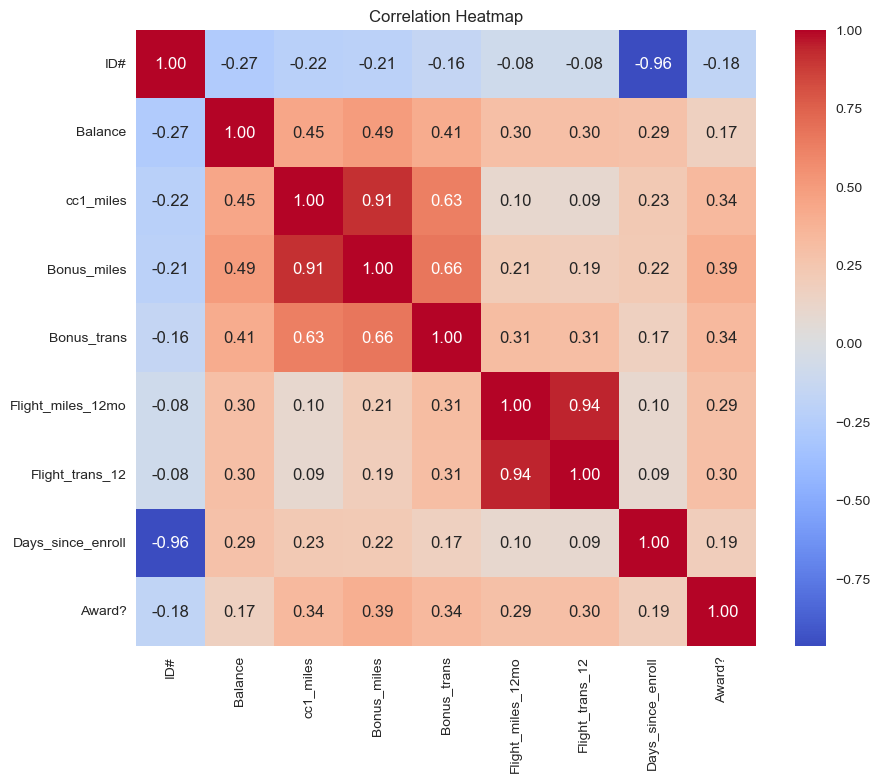

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(ed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Apply PCA

In [31]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

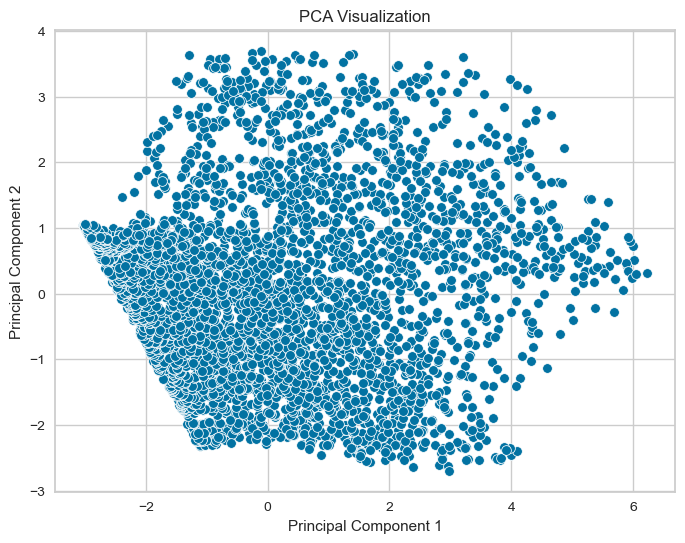

In [32]:
# Visualize PCA results

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [33]:
#Apply K-Means Clustering

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [34]:
# Add cluster labels to PCA DataFrame

pca_df['Cluster'] = clusters

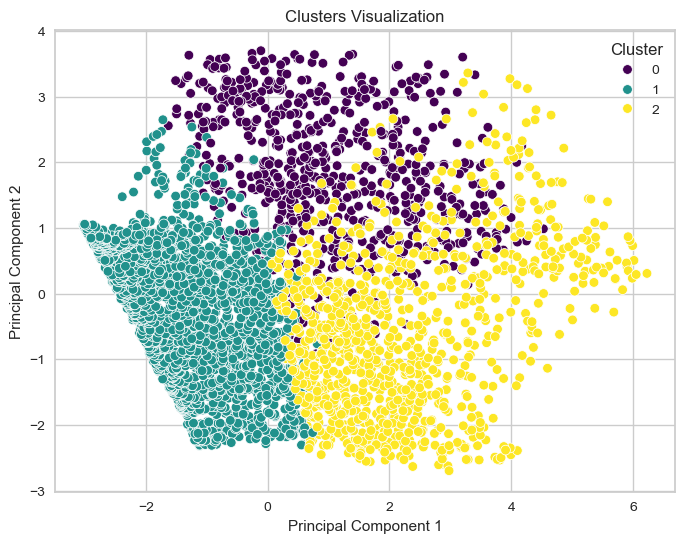

In [35]:
# Visualize clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

<Figure size 2000x800 with 0 Axes>

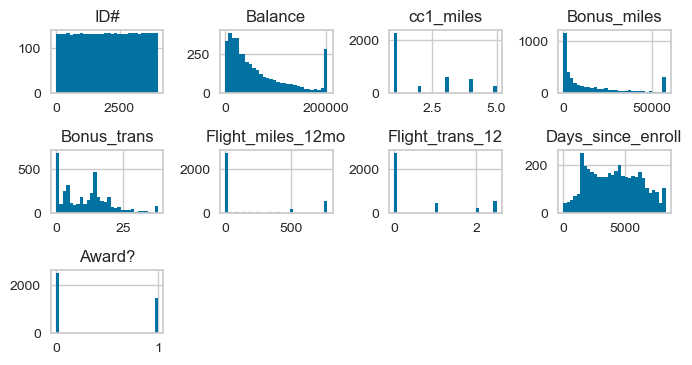

In [29]:
# Visualistaion

# Histogram
plt.figure(figsize=(20,8))
plt.tight_layout()
ed.hist(layout=(4,4),bins=30)
plt.subplots_adjust(hspace = 0.9, wspace = 0.5)
plt.show()

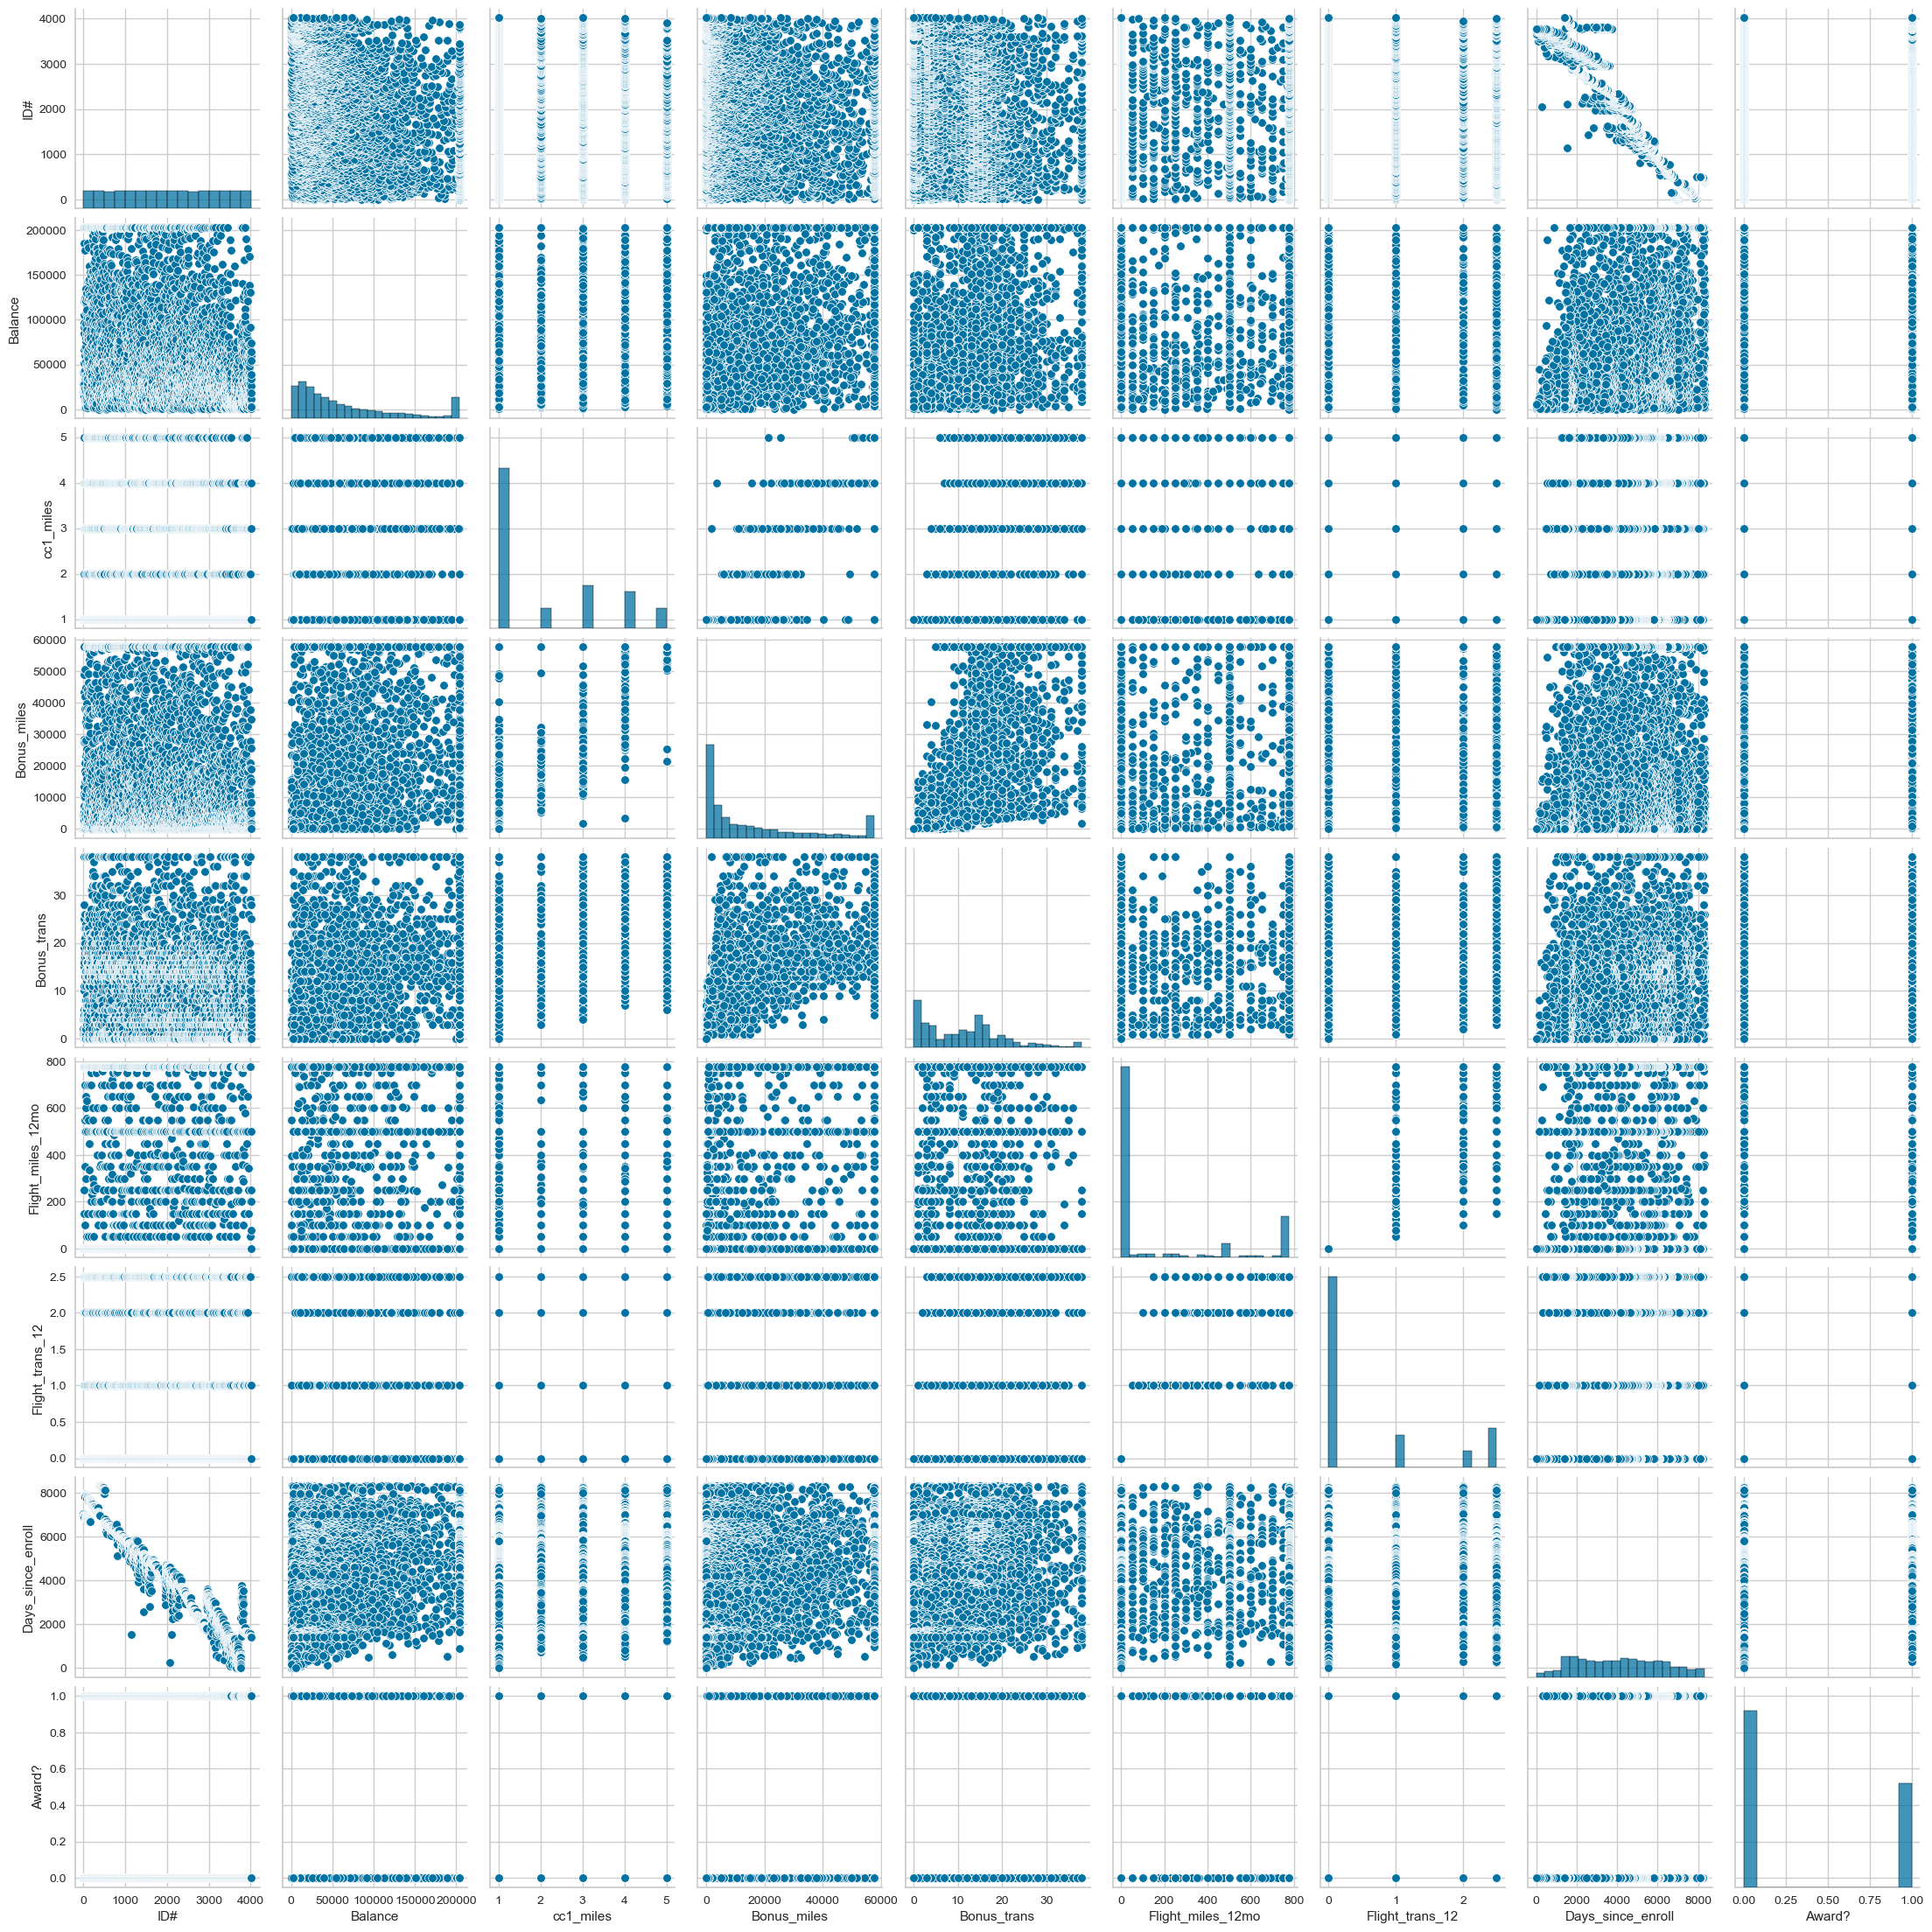

In [30]:
sns.pairplot(ed)
plt.show()

ID#


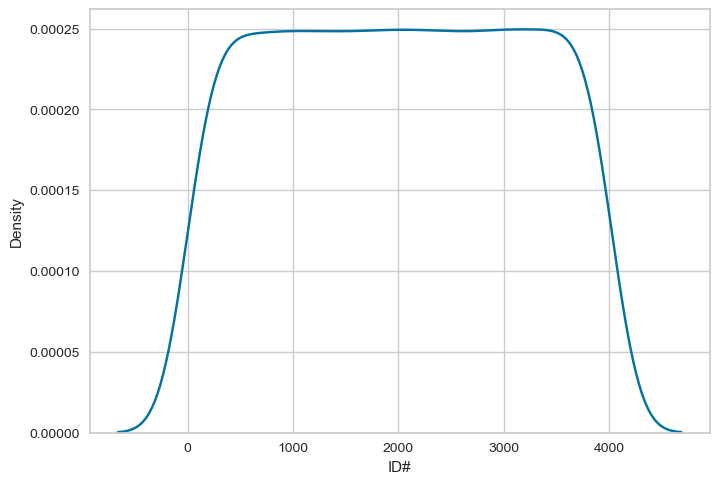

Balance


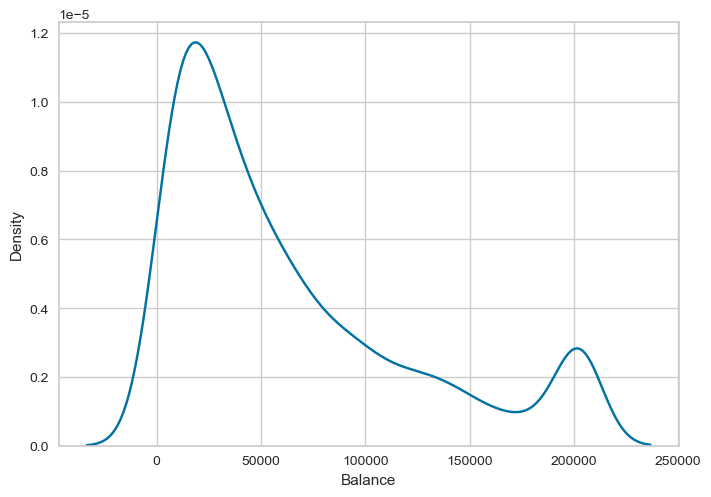

cc1_miles


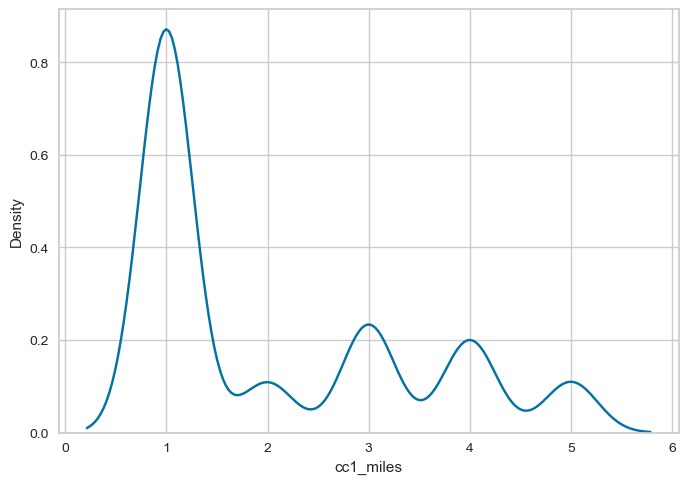

Bonus_miles


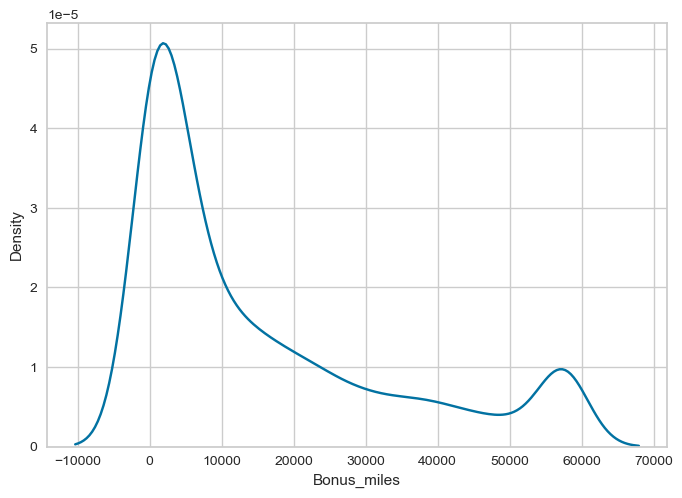

Bonus_trans


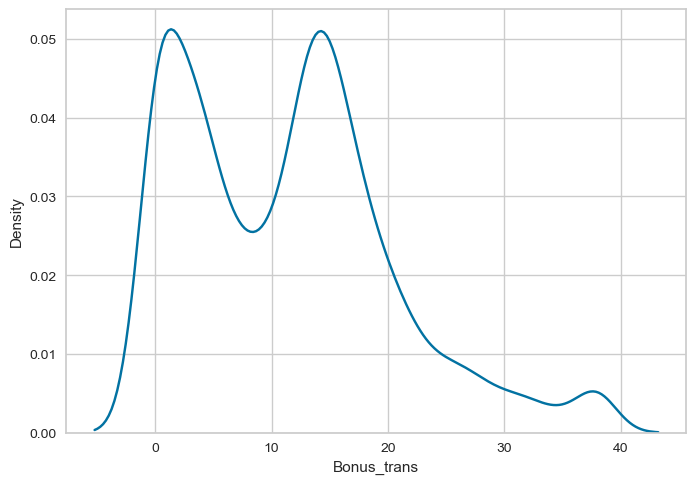

Flight_miles_12mo


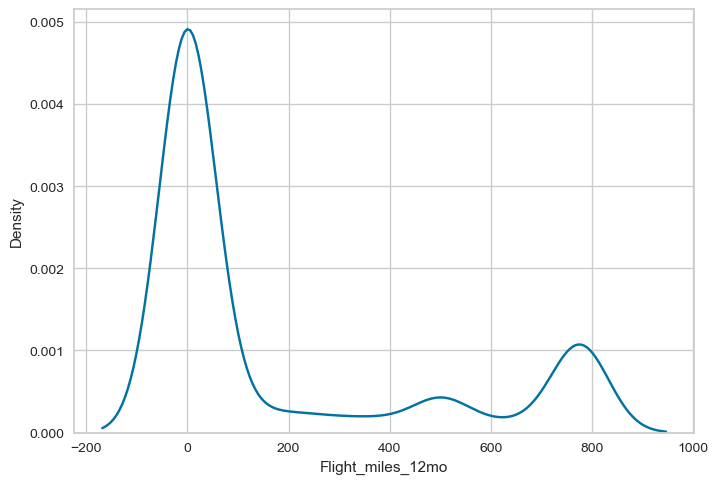

Flight_trans_12


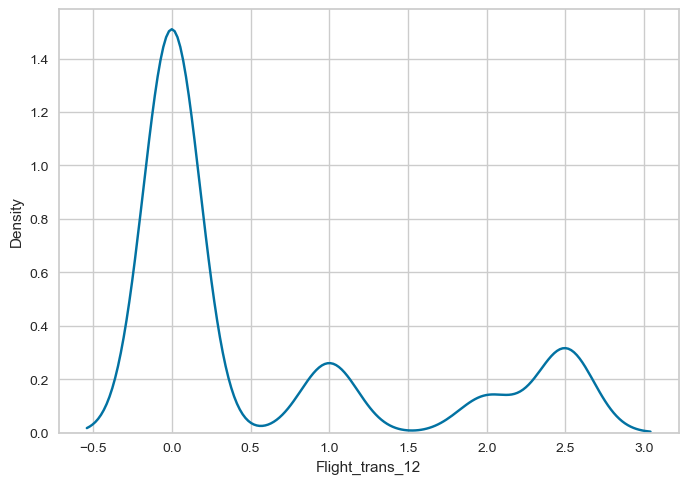

Days_since_enroll


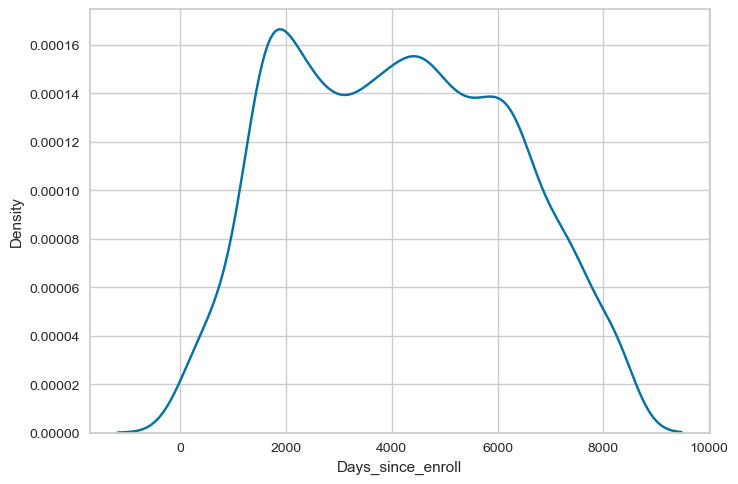

Award?


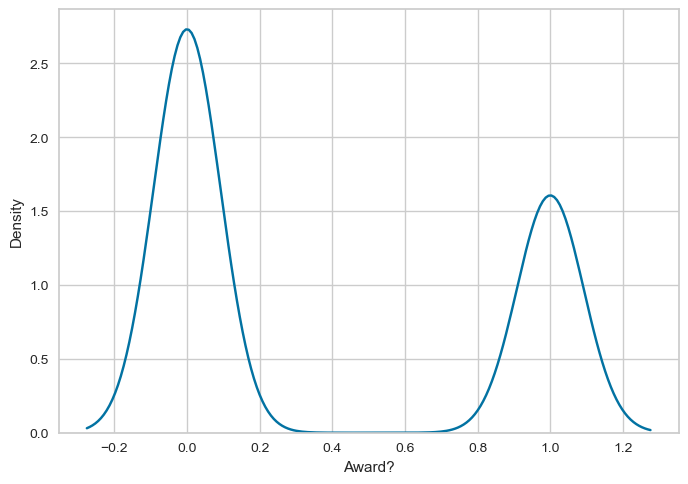

In [19]:
  # Kernel Density for every feature, singled out

for n in  ed.columns:
    print(n)
    sns.kdeplot(ed[n])
    plt.show()

# K mean Clustering

In [31]:
# # Normalization function 

scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(ed.iloc[:,1:])

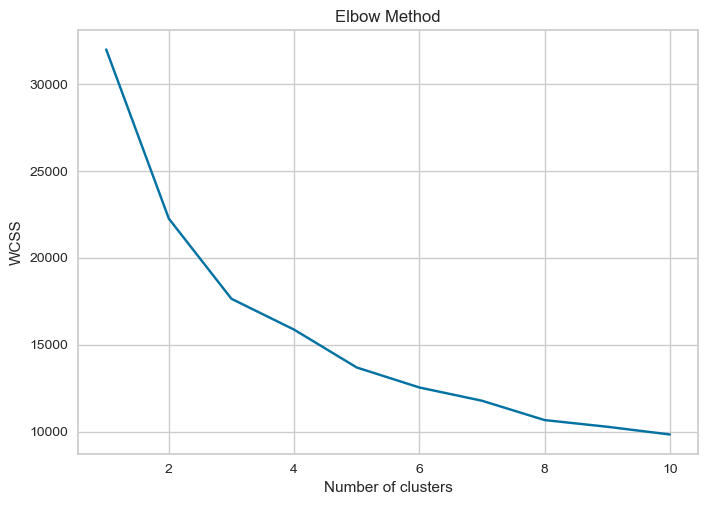

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=2, random_state=42)

In [37]:
# Cluster assignments and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [38]:
print("Cluster Labels:", labels)
print("Centroids:", centroids)


Cluster Labels: [0 0 0 ... 0 0 0]
Centroids: [[ 0.27341276 -0.42266603 -0.53276848 -0.5540634  -0.46110736 -0.29723195
  -0.29035602 -0.28040368 -0.34950979]
 [-0.48377396  0.7478613   0.94267552  0.98035457  0.81587902  0.52591942
   0.51375321  0.49614363  0.61841933]]


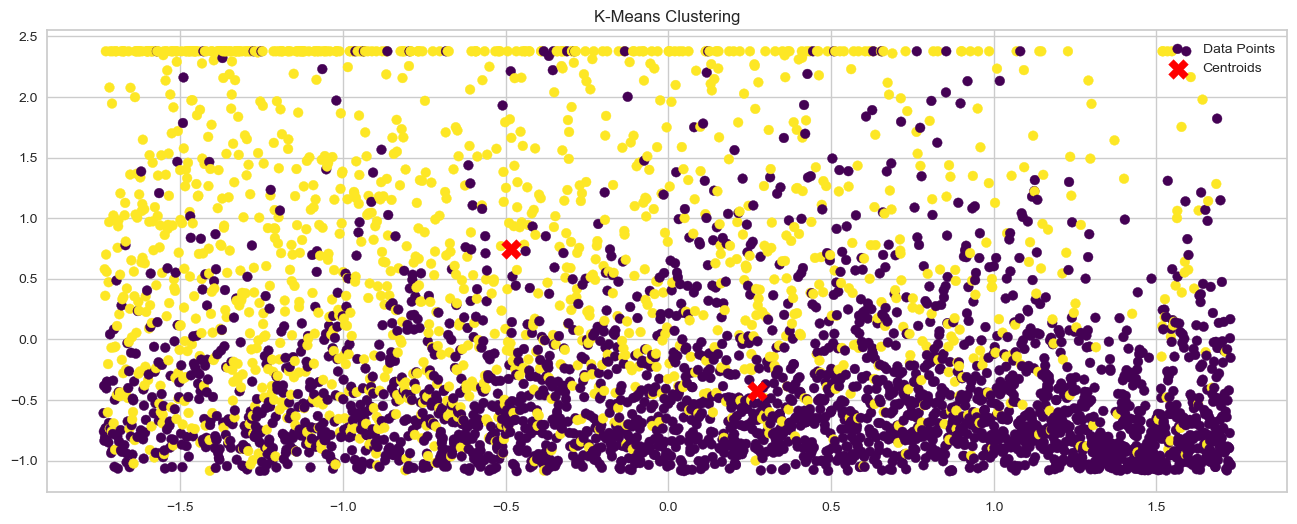

In [39]:
# Plotting the results
plt.figure(figsize=(16, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Hierachical Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

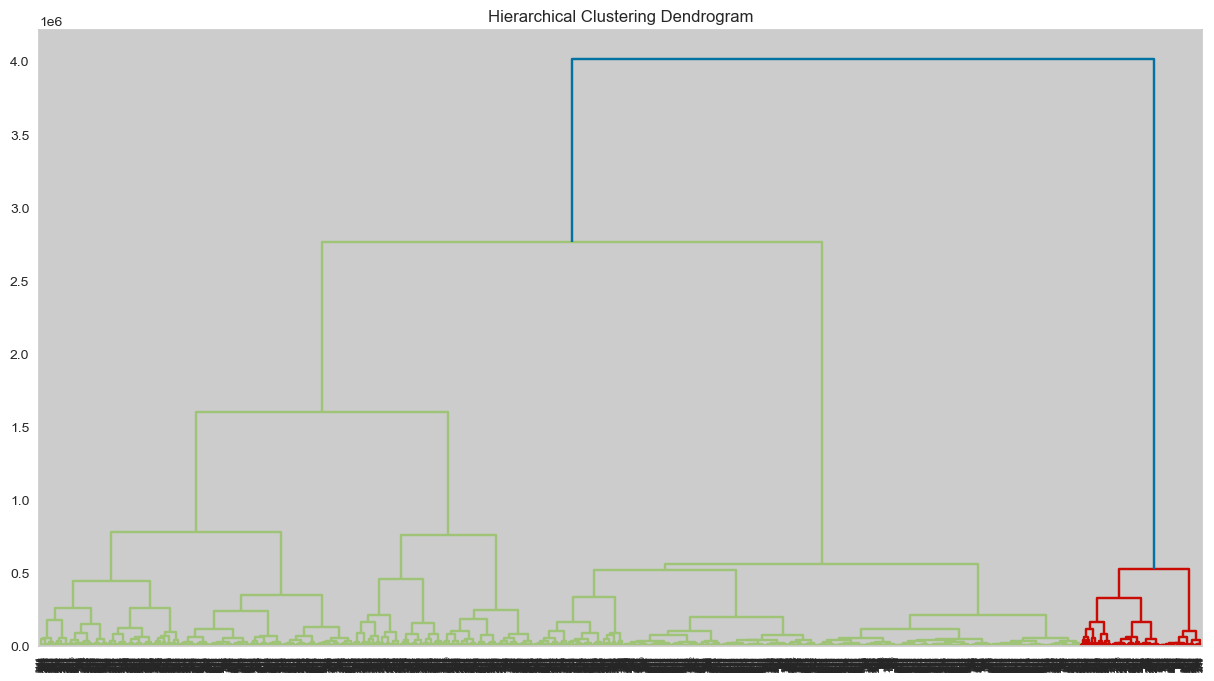

In [22]:
# Plot Dendrogram
linked = linkage(ed, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [24]:
# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = hierarchical.fit_predict(ed)

print("Cluster Labels:", labels)


Cluster Labels: [0 0 0 ... 0 0 0]


#  DBSCAN Clustering

In [40]:
from sklearn.cluster import DBSCAN

In [41]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=2)
labels = dbscan.fit_predict(data)


In [42]:
print("Cluster Labels:", labels)

Cluster Labels: [0 0 0 ... 1 0 0]


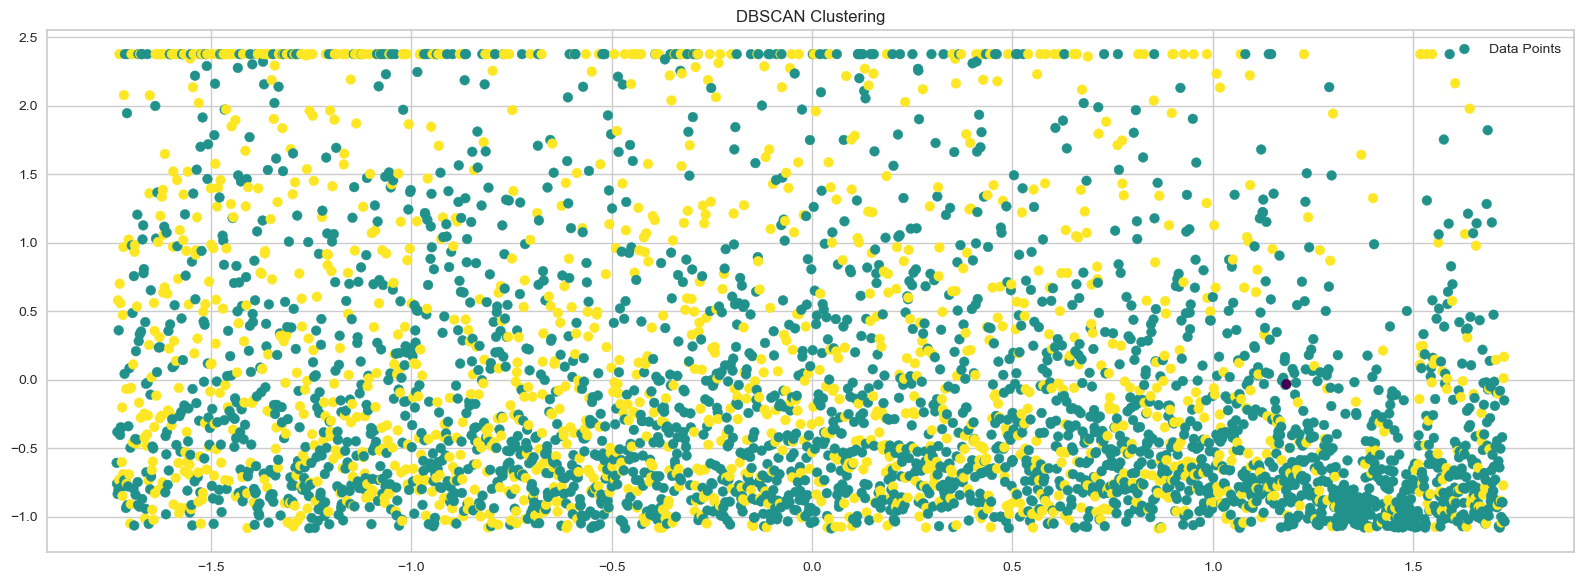

In [43]:
# Plotting the results
plt.figure(figsize=(16, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', label='Data Points')
plt.title('DBSCAN Clustering')
plt.tight_layout()
plt.legend()
plt.show()

# Cluster Analysis and Interpretation & Evoluation & Visualization:

In [43]:
# Evaluate K-Means performance using Silhouette Score

from sklearn.metrics import silhouette_score

# Apply K-Means with different K values
kmeans_4 = KMeans(n_clusters=4, random_state=0)
y_kmeans_4 = kmeans_4.fit_predict(data)

kmeans_6 = KMeans(n_clusters=6, random_state=0)
y_kmeans_6 = kmeans_6.fit_predict(data)

kmeans_score_4 = silhouette_score(data, y_kmeans_4)
kmeans_score_6 = silhouette_score(data, y_kmeans_6)

print(f"Silhouette Score for K-Means (K=4): {kmeans_score_4}")
print(f"Silhouette Score for K-Means (K=6): {kmeans_score_6}")

Silhouette Score for K-Means (K=4): 0.23904467973691296
Silhouette Score for K-Means (K=6): 0.25632576484779934


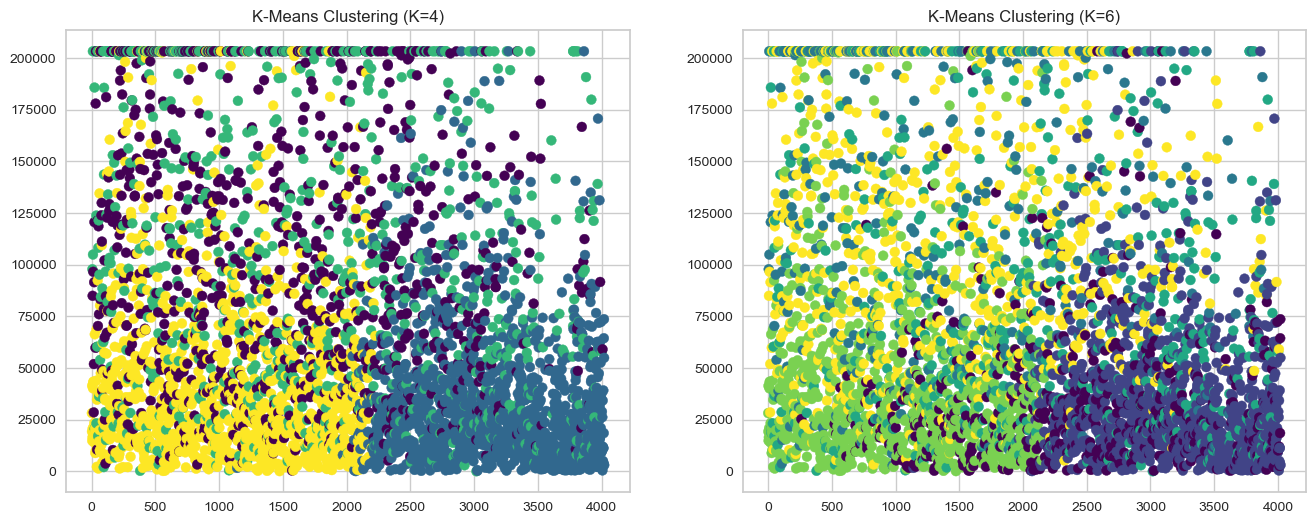

In [44]:
# Plot the results of K-Means clustering for K=4 and K=6
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# For K=4
ax[0].scatter(ed.iloc[:, 0], ed.iloc[:, 1], c=y_kmeans_4, s=50, cmap='viridis')
ax[0].set_title('K-Means Clustering (K=4)')

# For K=6
ax[1].scatter(ed.iloc[:, 0], ed.iloc[:, 1], c=y_kmeans_6, s=50, cmap='viridis')
ax[1].set_title('K-Means Clustering (K=6)')

plt.show()

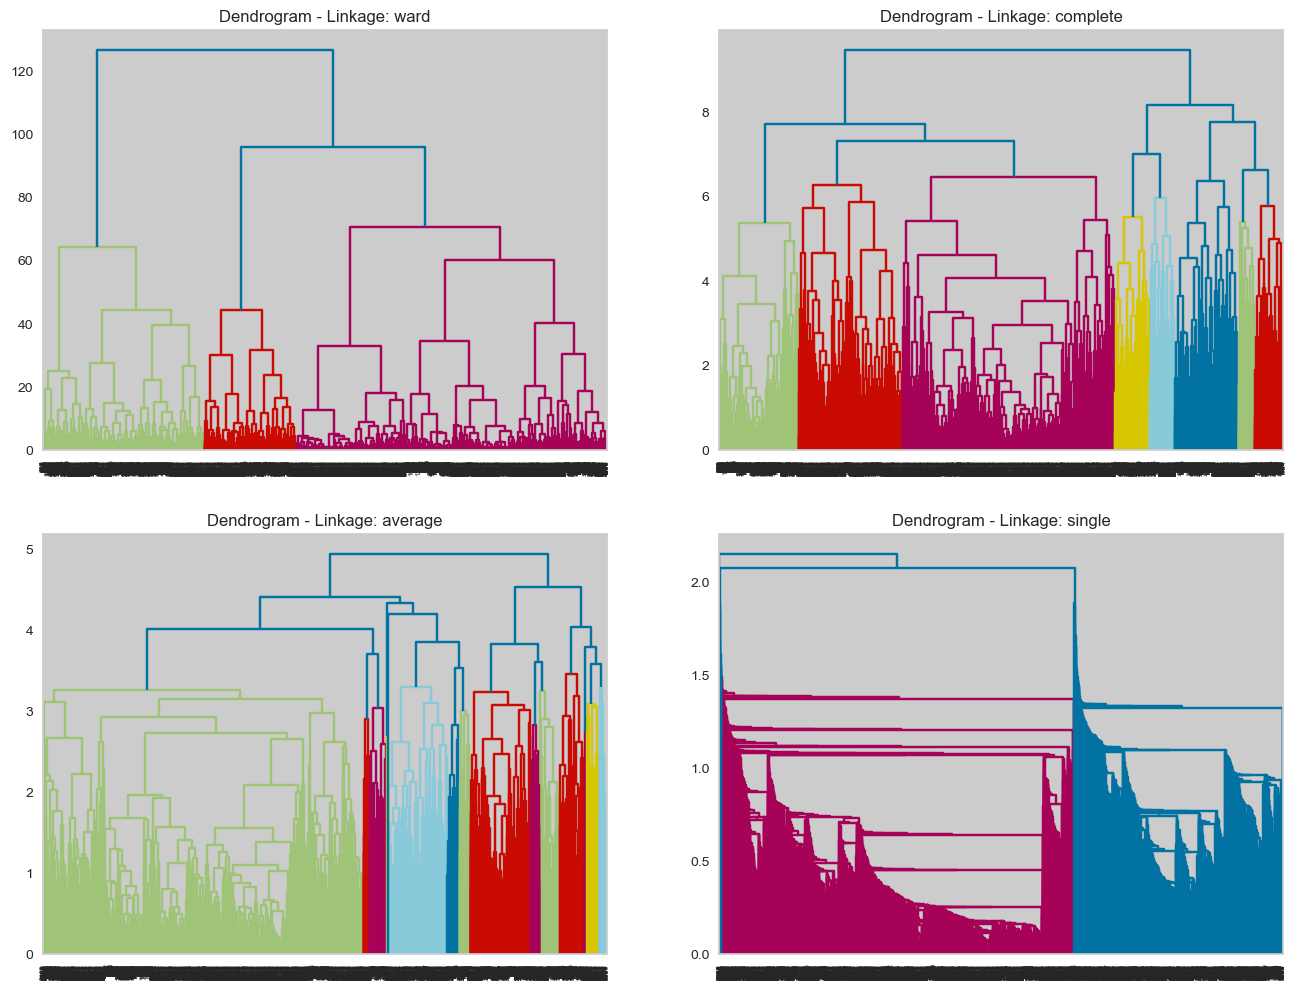

In [46]:
# 2. Hierarchical Clustering - Experimenting with different Linkage Methods

linkages = ['ward', 'complete', 'average', 'single']
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Generate Dendrograms for different linkage methods
for i, linkage in enumerate(linkages):
    ax[i//2, i%2].set_title(f'Dendrogram - Linkage: {linkage}')
    sch.dendrogram(sch.linkage(data, method=linkage), ax=ax[i//2, i%2])

plt.show()

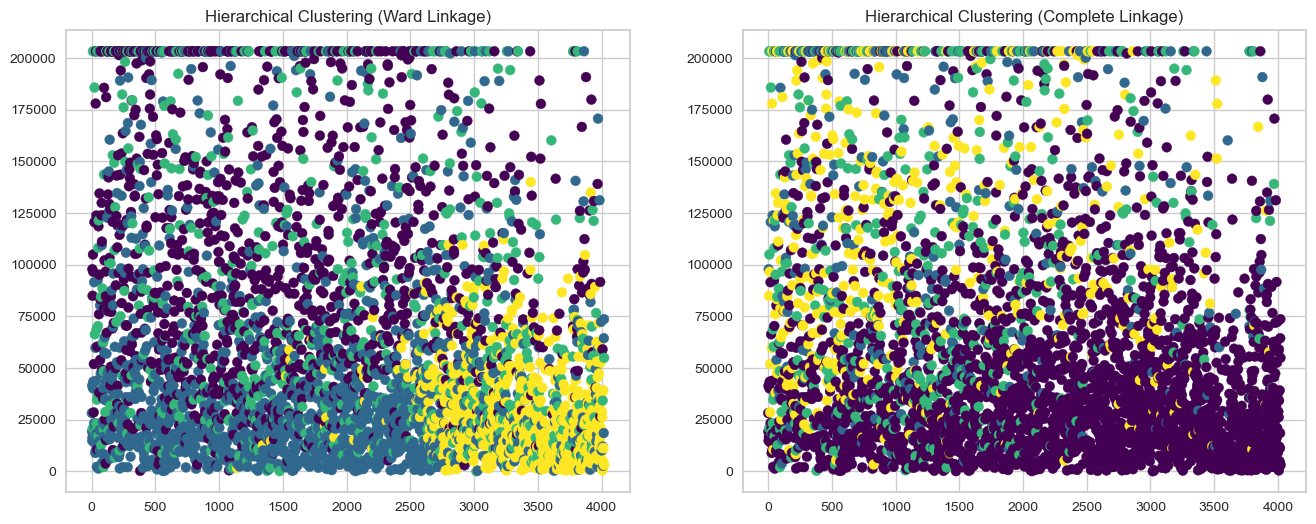

In [47]:
# Apply Agglomerative Clustering with different linkage methods (K=4)

agg_clust_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_agg_ward = agg_clust_ward.fit_predict(data)

agg_clust_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
y_agg_complete = agg_clust_complete.fit_predict(data)

# Plot the results of Hierarchical Clustering with different linkage methods
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# For Ward linkage
ax[0].scatter(ed.iloc[:, 0], ed.iloc[:, 1], c=y_agg_ward, s=50, cmap='viridis')
ax[0].set_title('Hierarchical Clustering (Ward Linkage)')

# For Complete linkage
ax[1].scatter(ed.iloc[:, 0], ed.iloc[:, 1], c=y_agg_complete, s=50, cmap='viridis')
ax[1].set_title('Hierarchical Clustering (Complete Linkage)')

plt.show()

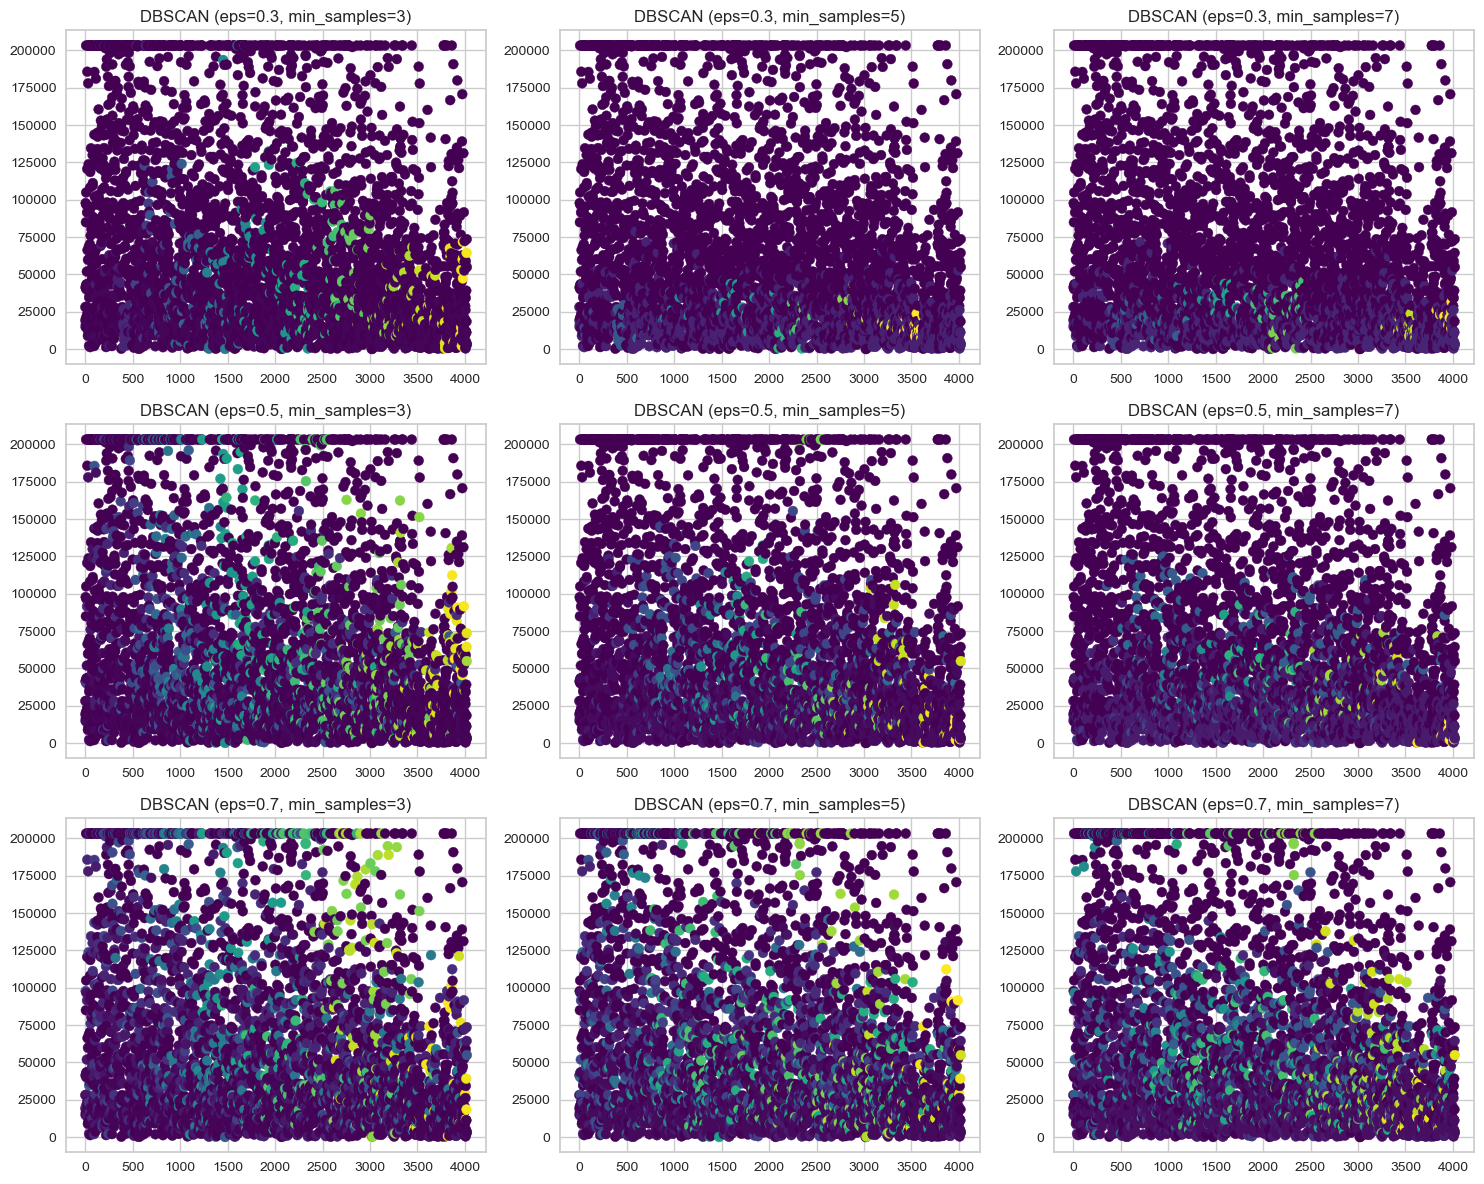

In [48]:
# 3. DBSCAN Clustering - Experimenting with different eps and min_samples values

eps_values = [0.3, 0.5, 0.7]  # Different epsilon values
min_samples_values = [3, 5, 7]  # Different min_samples values

fig, ax = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 12))

# Experiment with different eps and min_samples values
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_dbscan = dbscan.fit_predict(data)
        
        ax[i, j].scatter(ed.iloc[:, 0], ed.iloc[:, 1], c=y_dbscan, s=50, cmap='viridis')
        ax[i, j].set_title(f'DBSCAN (eps={eps}, min_samples={min_samples})')

plt.tight_layout()
plt.show()


In [49]:
# Evaluate DBSCAN performance using Silhouette Score
dbscan_score = silhouette_score(data, y_dbscan)  # Use the last DBSCAN result
print(f"Silhouette Score for DBSCAN: {dbscan_score}")

Silhouette Score for DBSCAN: -0.14805375458374886
